# Spatial Problem: In what cities will we be able to see upcoming solar eclipses?

An eclipse of the sun, or solar eclipse, happens when the moon moves between the sun and Earth. When this happens, the moon blocks the light of the sun from reaching Earth. There was a widely publicized solar eclipse that passed over the contiguous United States in 2017. Let's re-live the excitment by finding out where we can see solar eclipses in the future, using Python!

First we need to import our libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
#from geopandas import GeoSeries, GeoDataFrame

# new imports 
import os
data_pth = "../Data/"

Now to use some of our own data!

In [2]:
# Look in your Data directory to see this shapefile
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))
type(eclipses)

geopandas.geodataframe.GeoDataFrame

In [4]:
# Let's see what we've got in tabular format
eclipses.head()

OID_                Name                                       FolderPath  \
0     0               Umbra    TSE 2017.08.21/TSE 2017 August 21 Umbral Path   
1     0               Umbra      TSE 2019.07.02/TSE 2019 July 02 Umbral Path   
2     0               Umbra  TSE 2020.12.14/TSE 2020 December 14 Umbral Path   
3     0               Umbra  TSE 2021.12.04/TSE 2021 December 04 Umbral Path   
4     0  Umbra Limit (East)     HSE 2023.04.20/HSE 2023 April 20 Umbral Path   

   SymbolID  AltMode  Base  Clamped  Extruded Snippet PopupInfo  Shape_Leng  \
0         0        0   0.0       -1         0    None      None  303.633219   
1         0        0   0.0       -1         0    None      None  223.557661   
2         0        0   0.0       -1         0    None      None  310.979509   
3         0        0   0.0       -1         0    None      None  274.491359   
4         0        0   0.0       -1         0    None      None  267.246357   

   Shape_Area  Year                                           geometry  
0  130.461081  2017  POLYGON Z ((-171.57693 39.73810000000003 0, -1...  
1  165.607105  2019  POLYGON Z ((-160.39845 -37.64846999999997 0, -...  
2   99.233931  2020  POLYGON Z ((-132.81568 -7.773699999999963 0, -...  
3  757.922577  2021  POLYGON Z ((-51.18286999999998 -53.08708999999...  
4   31.230251  2023  POLYGON Z ((180.0000000000001 3.21677000000005...

In [5]:
eclipses.shape

(10, 14)

In [7]:
eclipses.iloc[0]

OID_                                                          0
Name                                                      Umbra
FolderPath        TSE 2017.08.21/TSE 2017 August 21 Umbral Path
SymbolID                                                      0
AltMode                                                       0
Base                                                          0
Clamped                                                      -1
Extruded                                                      0
Snippet                                                    None
PopupInfo                                                  None
Shape_Leng                                              303.633
Shape_Area                                              130.461
Year                                                       2017
geometry      POLYGON Z ((-171.57693 39.73810000000003 0, -1...
Name: 0, dtype: object

In [ ]:
# Another way to view tabular data is to transpose rows and columns
eclipses.head().T

In [8]:
# Check the coordinate reference system of our data, its crs
eclipses.crs

{'init': 'epsg:4326'}

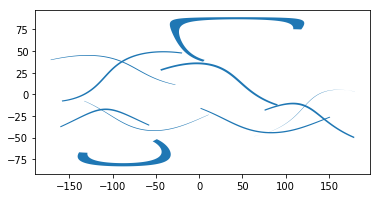

In [9]:
# Now we plot. Note that for simplicity and asthetics some eclipses were removed
# from the dataset or clipped if they crossed the International Date Line
eclipses.plot()

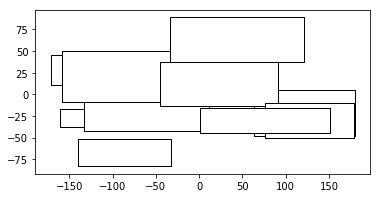

In [14]:
# Examine what the envelope of our data looks like. This comes in handy sometimes when you want to simplify
# your data, or if you want to zoom to a certain object's extent
eclipses.envelope.plot(color='white', edgecolor='k')

In [13]:
# We can examine number of shapes/records for each year
eclipses['Year'].value_counts()

2030    1
2028    1
2027    1
2026    1
2024    1
2023    1
2021    1
2020    1
2019    1
2017    1
Name: Year, dtype: int64

## Plot eclipses polygon over politcal boundaries layer

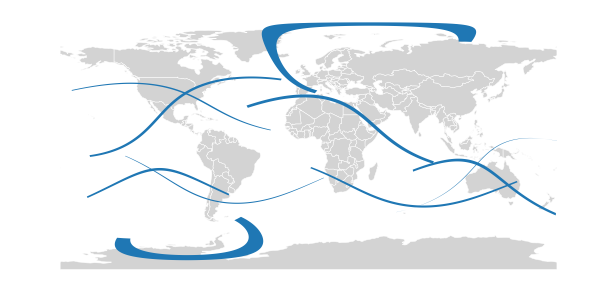

In [15]:
# Where exactly are these paths? Let's add our basemap to make this clear.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))

# Pass ax=base to the second layer
eclipses.plot(ax=base)

# There is an axis by default. You can see it if you comment out the below.
base.set_axis_off()

### overlay cities on the map

In [16]:
# Let's load in the cities provided by geopandas. Note these are just the capitals.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

(-197.99999999999994, 198.00000000000014, -98.95351100000003, 98.0237310000001)

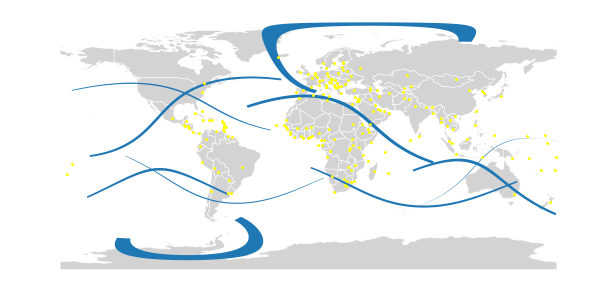

In [17]:
# Now we'll plot our basemap, our eclipse paths, and our cities
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=base)
cities.plot(marker='*', color='yellow', markersize=5, ax=base)
base.axis('off')

### Get more cities

In [18]:
# But we want MORE cities, so let's use our own. This is a local shapefile in your data directory.
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [19]:
cities.head()

SCALERANK  NATSCALE  LABELRANK       FEATURECLA                    NAME  \
0         10         1          8  Admin-1 capital  Colonia del Sacramento   
1         10         1          8  Admin-1 capital                Trinidad   
2         10         1          8  Admin-1 capital             Fray Bentos   
3         10         1          8  Admin-1 capital               Canelones   
4         10         1          8  Admin-1 capital                 Florida   

  NAMEPAR NAMEALT  DIFFASCII               NAMEASCII  ADM0CAP  \
0    None    None          0  Colonia del Sacramento      0.0   
1    None    None          0                Trinidad      0.0   
2    None    None          0             Fray Bentos      0.0   
3    None    None          0               Canelones      0.0   
4    None    None          0                 Florida      0.0   

                       ...                           wof_id  CAPALT  \
0                      ...                        421199749     NaN   
1                      ...                        890444639     NaN   
2                      ...                        890451703     NaN   
3                      ...                        890444649     NaN   
4                      ...                        890431207     NaN   

                  NAME_EN                 NAME_DE                 NAME_ES  \
0  Colonia del Sacramento  Colonia del Sacramento  Colonia del Sacramento   
1                Trinidad                Trinidad                Trinidad   
2             Fray Bentos             Fray Bentos             Fray Bentos   
3               Canelones               Canelones               Canelones   
4                 Florida                 Florida                 Florida   

                  NAME_FR                NAME_PT                  NAME_RU  \
0  Colonia del Sacramento  Colônia do Sacramento  Колония-дель-Сакраменто   
1                Trinidad               Trinidad                 Тринидад   
2             Fray Bentos            Fray Bentos              Фрай-Бентос   
3               Canelones              Canelones                Канелонес   
4                 Florida                Florida                  Флорида   

       NAME_ZH                                       geometry  
0  科洛尼亞德爾薩克拉門托  POINT (-57.84000247340134 -34.47999900541754)  
1         特立尼達   POINT (-56.90099656015872 -33.5439989373607)  
2        弗賴本托斯    POINT (-58.3039974719095 -33.1389990288435)  
3        卡內洛內斯  POINT (-56.28400149324307 -34.53800400667546)  
4         佛羅里達  POINT (-56.21499844799416 -34.09900200521719)  

[5 rows x 103 columns]

In [28]:
cities.shape

(7343, 103)

In [20]:
# Check the crs of our new cities data
cities.crs

{'init': 'epsg:4326'}

In [21]:
# Is the cities data still in the same crs as the eclipse data? Let's check.
eclipses.crs == cities.crs

True

(-198.38630091388424, 198.17962561808534, -99.64179619362255, 98.0565064854107)

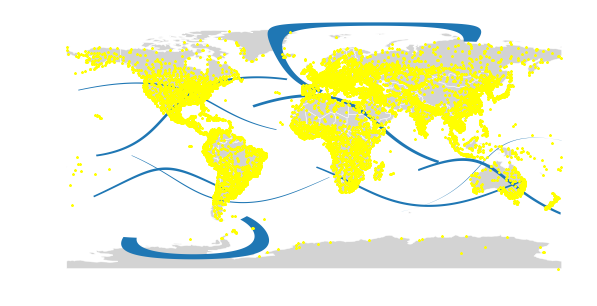

In [22]:
# Great. Let's plot it all again
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=base)
cities.plot(marker='*', color='yellow', markersize=5, ax=base)
base.axis('off')

(-198.38630091388424, 198.17962561808534, -99.64179619362255, 98.0565064854107)

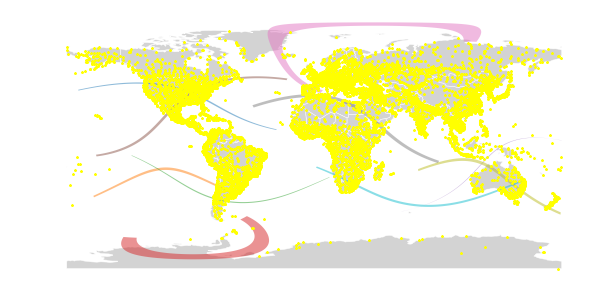

In [23]:
# Let's change our eclipse colors and transparency
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=base, cmap='tab10', alpha=0.5)
cities.plot(marker='*', color='yellow', markersize=5, ax=base)
base.axis('off')

In [24]:
# We can examine the years that we have data for
eclipses['Year']

0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

### More plotting - color by year and print legend

(-197.99999999999994, 198.00000000000014, -98.95351100000003, 98.0237310000001)

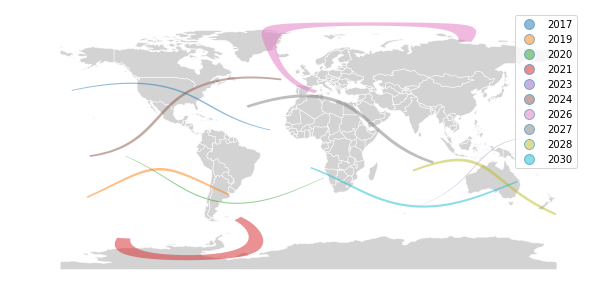

In [25]:
# But how do we know which is which?
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))

# We can add a catetorical value and set the column to Year. We can also add a legend.
eclipses.plot(ax=base, cmap='tab10', categorical=True, 
              alpha=0.5, column = "Year", legend=True)

base.axis('off')

In [27]:
type(base)

matplotlib.axes._subplots.AxesSubplot

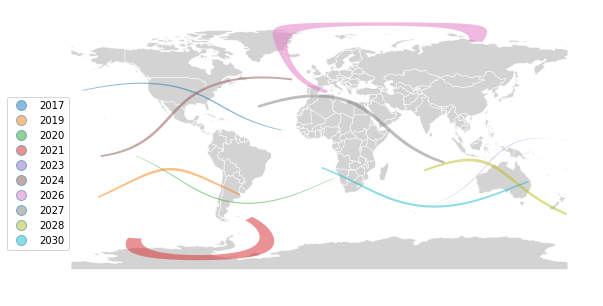

In [26]:
# Let's get that legend out of the way.
base.get_legend().set_bbox_to_anchor((.05,.7))
base.get_figure()

## Which eclipses will cover the largest population?

Instead of coloring the eclipses by year, we want to color based on the number of people that ought to be able to see them

Do a **spatial join**

In [29]:
# Start by getting all the cities that intersect any eclipse
allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')
allecities.head()

SCALERANK  NATSCALE  LABELRANK       FEATURECLA                NAME  \
12          10         1          7  Admin-1 capital           Kasserine   
13          10         1          7  Admin-1 capital         Sdid Bouzid   
15          10         1          7  Admin-1 capital              Mahdia   
454         10         1          5  Admin-1 capital  Bordj Bou Arréridj   
455         10         1          5  Admin-1 capital              M'sila   

    NAMEPAR NAMEALT  DIFFASCII           NAMEASCII  ADM0CAP  ...  SymbolID  \
12     None    None          0           Kasserine      0.0  ...         0   
13     None    None          0         Sdid Bouzid      0.0  ...         0   
15     None    None          0              Mahdia      0.0  ...         0   
454    None    None          0  Bordj Bou Arreridj      0.0  ...         0   
455    None    None          0              M'sila      0.0  ...         0   

     AltMode  Base Clamped Extruded Snippet PopupInfo Shape_Leng  Shape_Area  \
12         0   0.0      -1        0    None      None  303.52546  325.721626   
13         0   0.0      -1        0    None      None  303.52546  325.721626   
15         0   0.0      -1        0    None      None  303.52546  325.721626   
454        0   0.0      -1        0    None      None  303.52546  325.721626   
455        0   0.0      -1        0    None      None  303.52546  325.721626   

     Year  
12   2027  
13   2027  
15   2027  
454  2027  
455  2027  

[5 rows x 117 columns]

Drop some columns

In [30]:
allecities = pd.DataFrame(allecities[['POP_MAX', 'Year']])

In [31]:
allecities.head()

POP_MAX  Year
12     76243  2027
13     42098  2027
15     45977  2027
454   140000  2027
455   150000  2027

In [32]:
# Create a temporary variable to hold our years and populations
g = allecities.groupby(['Year'])[["POP_MAX"]].sum()

In [33]:
g

POP_MAX
Year          
2017   6264828
2019   1066143
2020    356052
2021        53
2023    104695
2024  27782741
2026   5414935
2027  22037126
2028   5188190
2030   4785390

In [34]:
eclipses_pop = pd.merge(eclipses, g, left_on='Year', right_index=True)

In [35]:
eclipses_pop.head()

OID_                Name  \
index_right                             
0               0               Umbra   
1               0               Umbra   
2               0               Umbra   
3               0               Umbra   
4               0  Umbra Limit (East)   

                                                  FolderPath  SymbolID  \
index_right                                                              
0              TSE 2017.08.21/TSE 2017 August 21 Umbral Path         0   
1                TSE 2019.07.02/TSE 2019 July 02 Umbral Path         0   
2            TSE 2020.12.14/TSE 2020 December 14 Umbral Path         0   
3            TSE 2021.12.04/TSE 2021 December 04 Umbral Path         0   
4               HSE 2023.04.20/HSE 2023 April 20 Umbral Path         0   

             AltMode  Base  Clamped  Extruded Snippet PopupInfo  Shape_Leng  \
index_right                                                                   
0                  0   0.0       -1         0    None      None  303.633219   
1                  0   0.0       -1         0    None      None  223.557661   
2                  0   0.0       -1         0    None      None  310.979509   
3                  0   0.0       -1         0    None      None  274.491359   
4                  0   0.0       -1         0    None      None  267.246357   

             Shape_Area  Year  \
index_right                     
0            130.461081  2017   
1            165.607105  2019   
2             99.233931  2020   
3            757.922577  2021   
4             31.230251  2023   

                                                      geometry  POP_MAX  
index_right                                                              
0            POLYGON Z ((-171.57693 39.73810000000003 0, -1...  6264828  
1            POLYGON Z ((-160.39845 -37.64846999999997 0, -...  1066143  
2            POLYGON Z ((-132.81568 -7.773699999999963 0, -...   356052  
3            POLYGON Z ((-51.18286999999998 -53.08708999999...       53  
4            POLYGON Z ((180.0000000000001 3.21677000000005...   104695

## Plot eclipses colored by population they cover

(-197.99999999999997,
 198.00000000000017,
 -98.95351100000003,
 98.02373100000007)

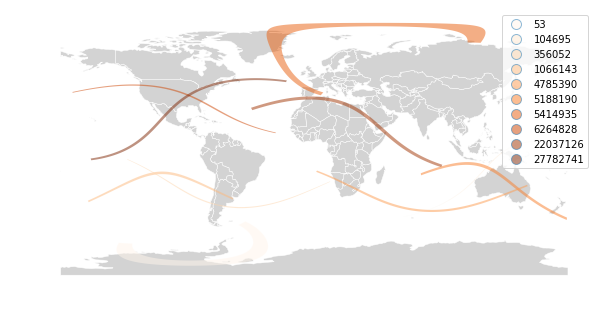

In [38]:
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', 
                  figsize=(10,6))

eclipses_pop.plot(ax=base, cmap='Oranges', categorical=True, 
                  alpha=0.5, column = "POP_MAX", legend=True)

base.axis('off')

In [37]:
g.sort_values('POP_MAX', ascending = False)

POP_MAX
Year          
2024  27782741
2027  22037126
2017   6264828
2026   5414935
2028   5188190
2030   4785390
2019   1066143
2020    356052
2023    104695
2021        53

## Are any eclipses passing over Cleveland?

We can find out by intersecting the cities with the eclipse paths, then seeing if Cleveland is in the result!

In [57]:
# Let's create a variable to just hold the Cleveland city point
mycity = cities.loc[cities['NAME'] == 'Cleveland']

In [58]:
mycity

SCALERANK  NATSCALE  LABELRANK       FEATURECLA       NAME  \
index_left                                                               
6793                3       110          1  Populated place  Cleveland   

           NAMEPAR NAMEALT  DIFFASCII  NAMEASCII  ADM0CAP  \
index_left                                                  
6793          None    None          0  Cleveland      0.0   

                                ...                          wof_id  CAPALT  \
index_left                      ...                                           
6793                            ...                       101712563     NaN   

              NAME_EN    NAME_DE    NAME_ES    NAME_FR    NAME_PT   NAME_RU  \
index_left                                                                    
6793        Cleveland  Cleveland  Cleveland  Cleveland  Cleveland  Кливленд   

           NAME_ZH                                      geometry  
index_left                                                        
6793          克里夫蘭  POINT (-81.69694406998963 41.47193265371732)  

[1 rows x 103 columns]

In [59]:
# Now we can use sjoin and intersects to find out of Cleveland intersects any eclipse paths
e_mycity = gpd.sjoin(mycity, eclipses, how='inner', op='intersects')

In [60]:
def e_result(city, eclipse):
    if len(city) > 0:
        return '{} eclipse(s) will pass through {}. Year(s): {}'.format(len(eclipse), list(city['NAME'])[0], [y for y in eclipse['Year']])
    else:
        return 'No eclipses passing through {}'.format(list(city['NAME'])[0])

In [61]:
e_result(mycity, e_mycity)

'1 eclipse(s) will pass through Cleveland. Year(s): [2024]'

In [62]:
# There is one! Let's assign that eclipse to a variable.
# This will only work if there is a 1:1 city:eclipse, 
# hence the if/else. This will help if you want to try another city.

if len(e_mycity) > 1:
    print('What luck! This city has more than one eclipse! But a city that has just has one.')
elif len(e_mycity) == 1:
    e_mycity = eclipses.loc[eclipses['Year'] == int(e_mycity['Year'])]
else:
    print('There are no eclipses in your city')

(-13.450309999999945, 54.82445000000007)

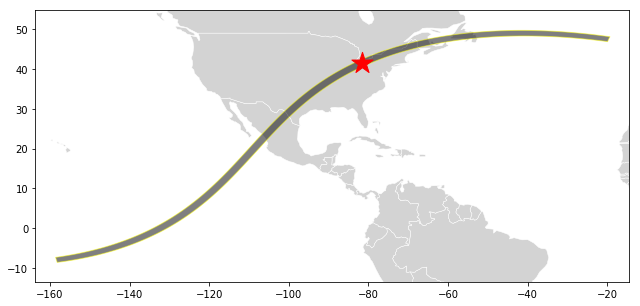

In [65]:
# Plot it!
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
if len(e_mycity) > 0:
    # plot the eclipse
    e_mycity.plot(ax=base, color='black', edgecolor='yellow', alpha=0.5, legend=True)

    # get the bounding box or envelope of eclipse
    bounds = e_mycity.geometry.bounds
mycity.plot(marker='*', color='red', markersize=500, ax=base)

# Zoom to the bounds of the eclipse by setting the bounds to the min/max x/y of your layer
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

Are there any eclipses passing over your city?

## Which Eclipse Do You Want to Map?

In [66]:
# Let's look at our options again
eclipses['Year']

index_right
0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

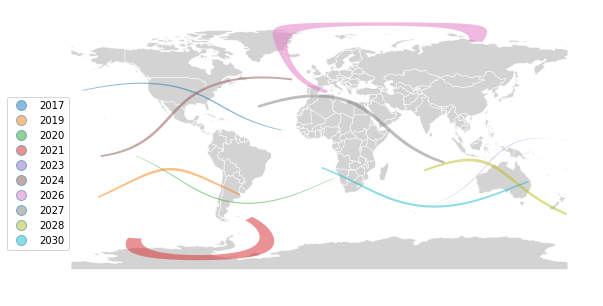

In [67]:
# And plot again
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=base, cmap='tab10', categorical=True, 
              alpha=0.5, column = "Year", legend=True)

base.axis('off')
base.get_legend().set_bbox_to_anchor((.05,.7))

In [72]:
# I'll pick the one from 2017, it was on my birthday after all.
myeclipse = eclipses[(eclipses['Year'] == 2020)]
myeclipse

OID_   Name                                       FolderPath  \
index_right                                                                 
2               0  Umbra  TSE 2020.12.14/TSE 2020 December 14 Umbral Path   

             SymbolID  AltMode  Base  Clamped  Extruded Snippet PopupInfo  \
index_right                                                                 
2                   0        0   0.0       -1         0    None      None   

             Shape_Leng  Shape_Area  Year  \
index_right                                 
2            310.979509   99.233931  2020   

                                                      geometry  
index_right                                                     
2            POLYGON Z ((-132.81568 -7.773699999999963 0, -...

(-198.36062037118467, 198.1539450753859, -99.34968948168924, 92.3591690229376)

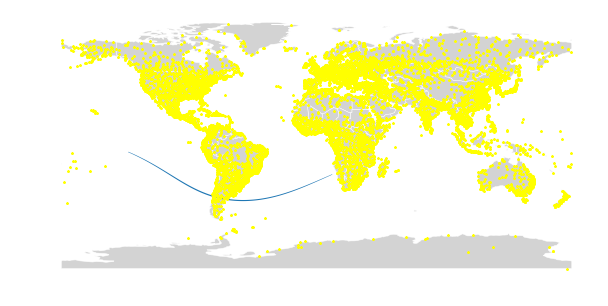

In [70]:
# Let's plot it 
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=base)
cities.plot(marker='*', color='yellow', markersize=5, ax=base)
base.axis('off')

(-47.42862999999994, -2.6344099999999457)

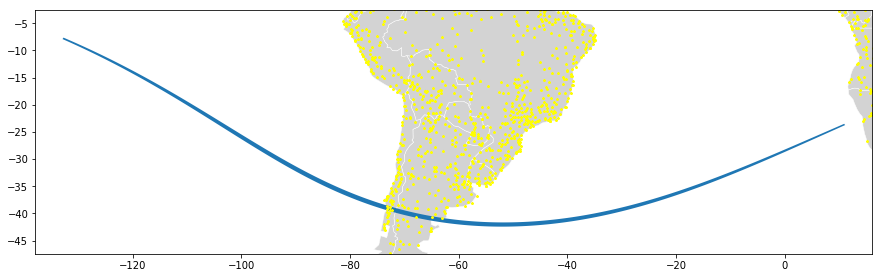

In [71]:
# Plot again, but this time I want to zoom in on my chosen eclipse path
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=base)
cities.plot(marker='*', color='yellow', markersize=5, ax=base)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

(-47.42862999999994, -2.6344099999999457)

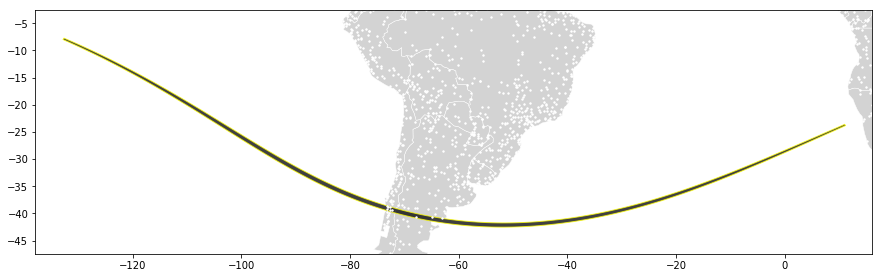

In [73]:
# Let's style the plot so that the eclipse looks eclipse-ier
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='o', color='white', markersize=2, ax=base)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [74]:
# Check that the crs are the same for myeclipse and cities
print('data is in the same crs:', myeclipse.crs == cities.crs, ':', myeclipse.crs)

data is in the same crs: True : {'init': 'epsg:4326'}


### Find which cities overlap with the path

In [75]:
# We can see that there are a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
# from geopandas.tools import sjoin
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')
ecities.head()

SCALERANK  NATSCALE  LABELRANK       FEATURECLA            NAME NAMEPAR  \
1386          8        10          3  Populated place  Nueva Imperial    None   
1387          8        10          3  Populated place        Loncoche    None   
1388          8        10          3  Populated place       Villarica    None   
1389          8        10          3  Populated place          Toltén    None   
3940          7        20          3  Populated place         Carahue    None   

     NAMEALT  DIFFASCII       NAMEASCII  ADM0CAP  ...  SymbolID  AltMode  \
1386    None          0  Nueva Imperial      0.0  ...         0        0   
1387    None          0        Loncoche      0.0  ...         0        0   
1388    None          0       Villarica      0.0  ...         0        0   
1389    None          0          Tolten      0.0  ...         0        0   
3940    None          0         Carahue      0.0  ...         0        0   

      Base Clamped Extruded Snippet PopupInfo  Shape_Leng Shape_Area  Year  
1386   0.0      -1        0    None      None  310.979509  99.233931  2020  
1387   0.0      -1        0    None      None  310.979509  99.233931  2020  
1388   0.0      -1        0    None      None  310.979509  99.233931  2020  
1389   0.0      -1        0    None      None  310.979509  99.233931  2020  
3940   0.0      -1        0    None      None  310.979509  99.233931  2020  

[5 rows x 117 columns]

In [76]:
ecities.shape

(8, 117)

In [83]:
type(ecities.iloc[0].geometry)

shapely.geometry.point.Point

(-45.73287677130543, -33.70948606491709)

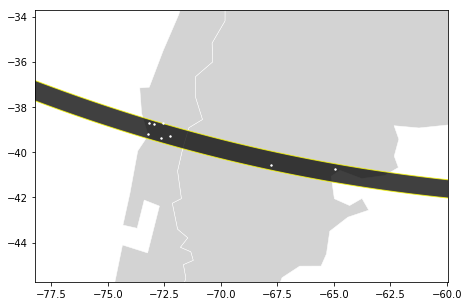

In [78]:
# Let's plot the results!
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(marker='o', color='white', markersize=2, ax=base)

# bounds = myeclipse.geometry.bounds
bounds = ecities.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [79]:
print('Wow! There are {} cities in your path!'.format(len(ecities)))
print()
print(ecities['NAME'])

Wow! There are 8 cities in your path!

1386       Nueva Imperial
1387             Loncoche
1388            Villarica
1389               Toltén
3940              Carahue
4406    San Antonio Oeste
4407      Sierra Colorado
5337               Temuco
Name: NAME, dtype: object


# Make it Slippy

Now we want to put our data on a slippy map. But before we do, let's take a quick detour. (Note: refer back to slides for Tile exercises)

In [84]:
import folium

In [85]:
# Let's find the centroid of the eclipse we chose, so that we can center our folum map on it
x = myeclipse.centroid.x.values[0]
y = myeclipse.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

# Note: results will vary depending on the eclipse you chose

y: -32.75940046791214, x: -64.11979201596152


Let's choose a basemap! There are many options, [check them out](https://deparkes.co.uk/2016/06/10/folium-map-tiles/).

In [91]:
# Note: no matter what projection you were in before, the folium maps will be in Web Mercator
map_osm = folium.Map(location=[y, x], zoom_start=3)
map_osm

In [92]:
type(map_osm)

folium.folium.Map

In [93]:
map_osm.get_bounds()

[[None, None], [None, None]]

In [94]:
map_carto = folium.Map(
    location=[y, x],
    tiles='Cartodb Positron',
    zoom_start=3
)
map_carto

In [95]:
map_stamen = folium.Map(
    location=[y, x],
    tiles='stamenwatercolor',
    zoom_start=3
)
map_stamen

In [96]:
map_stamen.crs

'EPSG3857'

In [98]:
map_stamen.location

[-32.75940046791214, -64.11979201596152]

### Plot the eclipse and cities to an interactive folium map

In [101]:
folium.GeoJson(ecities,name='Eclipse Cities').add_to(map_stamen)
folium.GeoJson(myeclipse,name='Eclipse Path').add_to(map_stamen)

# Add a layer control if you like
folium.LayerControl().add_to(map_stamen)

map_stamen

### Add popup for the cities

In [104]:
# You can write a function that creates a map with all of your properties
# This one creates popups for your cities

def plot_city_pop(ecities, myeclipse):
    # generate a new map
    folium_map = folium.Map(location=[y, x], zoom_start=3, tiles="CartoDB Positron")
    folium.GeoJson(myeclipse,name='Eclipse Path').add_to(folium_map)
    # for each row in the data, add a cicle marker
    for index, row in ecities.iterrows():
        
        # generate the popup message that is shown on click.
        popup_text = "Name: {}<br> Pop: {}"
        popup_text = popup_text.format(row["NAME"], row["POP_MAX"])
        
        folium.CircleMarker(location=(row['geometry'].y, row['geometry'].x),
                            radius=5,popup=popup_text,fill=True).add_to(folium_map)

    # Add a layer control if you like
    folium.LayerControl().add_to(folium_map)
    
    return folium_map

In [107]:
# Call the function to create the map
f_popup_map = plot_city_pop(ecities, myeclipse)
f_popup_map

In [108]:
f_popup_map.save('./mymap.html')

In [109]:
# Saving your results as a Esri Shapefile is easy with GeoPandas
myeclipse.to_file('../Data/myeclipse.shp', driver='ESRI Shapefile')
ecities.to_file('../Data/ecities.shp', driver='ESRI Shapefile')

In [110]:
import fiona

In [111]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

Your turn: Go Nuts!

**Make your own map **
* Choose a base map
* Add any of the data we've worked with so far
* Choose your own colors and styles
* Add or change the popups
* Use GeoPandas to answer any lingering questions about these eclipses, then plot it on your slippy map


In [ ]:
m = folium.Map(location=[41.4993, -81.6944], zoom_start=7)
m.choropleth(
    geo_data=eclipses,
    fill_color='Black',
    fill_opacity=0.3,
    line_weight=2,
)

m

I hope you enjoyed this tutorial. Thank you!